<a href="https://colab.research.google.com/github/shreyashete/leafdiseaseprediction/blob/main/Copy_of_Copy_of_Untitled3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
import numpy as np

In [ ]:
np.random.seed(1337)
classifier = Sequential()


In [ ]:
classifier.add(Convolution2D(32, 3, 3, input_shape = (128, 128, 3), activation = 'relu',padding="same"))
classifier.add(MaxPooling2D(pool_size = (2, 2),padding="same"))
classifier.add(Convolution2D(16, 3, 3, activation = 'relu',padding="same"))
classifier.add(MaxPooling2D(pool_size = (2, 2),padding="same"))
classifier.add(Convolution2D(8, 3, 3, activation = 'relu',padding="same"))
classifier.add(MaxPooling2D(pool_size = (2, 2),padding="same"))

In [ ]:
classifier.add(Flatten())

In [ ]:
classifier.add(Dense( 128, activation = 'relu'))
classifier.add(Dropout( 0.5))

In [ ]:
classifier.add(Dense(10, activation = 'softmax'))

In [ ]:
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
print(classifier.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 43, 43, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 8)           1160      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 8)          0

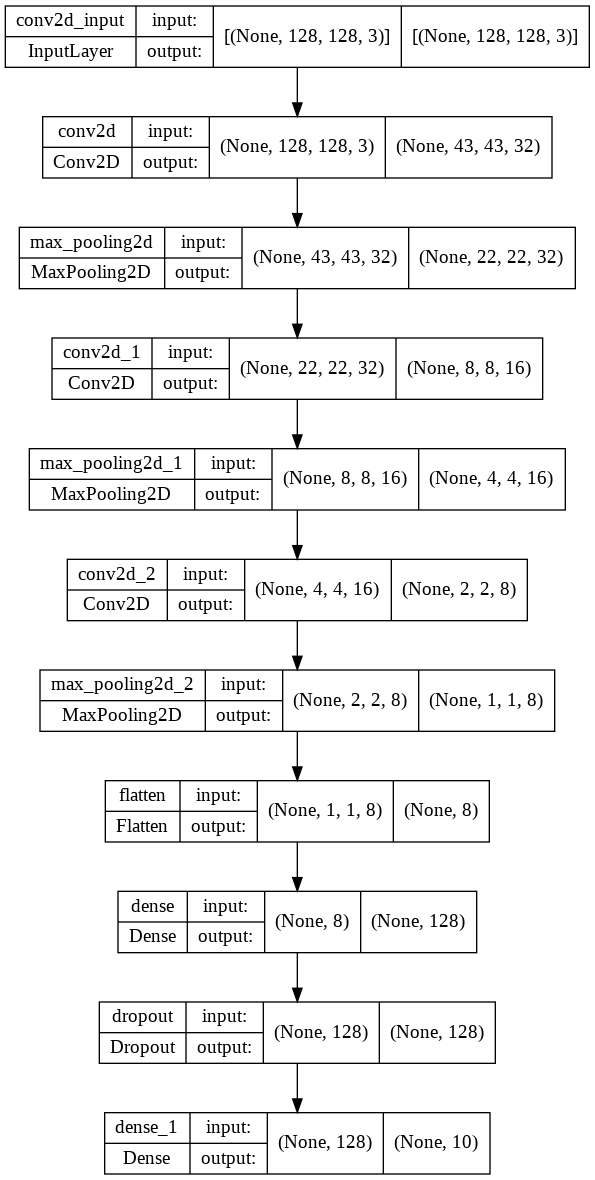

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(classifier, show_shapes=True, to_file='PlantVillage_CNN.png')

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
training_set = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/train',
        target_size=(128, 128),
        batch_size=64,
        class_mode='categorical' 
        )
label_map = (training_set.class_indices)


Found 2420 images belonging to 10 classes.


In [ ]:

# from utils import label_map_util
# from utils import visualization_utils as vis_util
# from object_detection.utils import label_map_util
# from object_detection.utils import visualization_utils as vis_util
#label_map = (training_set.class_indices)
print(label_map)

{'Tomato___Bacterial_spot': 0, 'Tomato___Early_blight': 1, 'Tomato___Late_blight': 2, 'Tomato___Leaf_Mold': 3, 'Tomato___Septoria_leaf_spot': 4, 'Tomato___Spider_mites Two-spotted_spider_mite': 5, 'Tomato___Target_Spot': 6, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7, 'Tomato___Tomato_mosaic_virus': 8, 'Tomato___healthy': 9}


In [ ]:

test_set = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/val',
        target_size=(128, 128),
        batch_size=64,
        class_mode='categorical')


Found 980 images belonging to 10 classes.


In [ ]:
# input_shape = (128, 128, 3)
history = classifier.fit_generator(
        training_set,
        steps_per_epoch=10,
        epochs=100,
        validation_data=test_set,
        validation_steps=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/100
10/10 [==============================] - 57s 6s/step - loss: 1.2173 - accuracy: 0.4250 - val_loss: 4.2671 - val_accuracy: 0.1609
Epoch 2/100
10/10 [==============================] - 40s 4s/step - loss: 1.2011 - accuracy: 0.3969 - val_loss: 3.9510 - val_accuracy: 0.1562
Epoch 3/100
10/10 [==============================] - 27s 3s/step - loss: 1.1418 - accuracy: 0.4219 - val_loss: 4.3376 - val_accuracy: 0.1813
Epoch 4/100
10/10 [==============================] - 24s 2s/step - loss: 1.0706 - accuracy: 0.5127 - val_loss: 4.5205 - val_accuracy: 0.2000
Epoch 5/100
10/10 [==============================] - 20s 2s/step - loss: 0.9971 - accuracy: 0.5688 - val_loss: 4.7700 - val_accuracy: 0.1875
Epoch 6/100
10/10 [==============================] - 13s 1s/step - loss: 0.8686 - accuracy: 0.6641 - val_loss: 4.9334 - val_accuracy: 0.1937
Epoch 7/100
10/10 [==============================] - 13s 1s/step - loss: 0.8171 - accuracy: 0.6781 - val_loss: 4.9604 - val_accuracy: 0.1922
Epoch 8/100
1

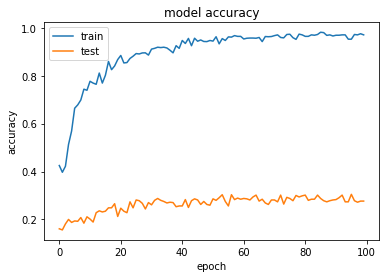

In [ ]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

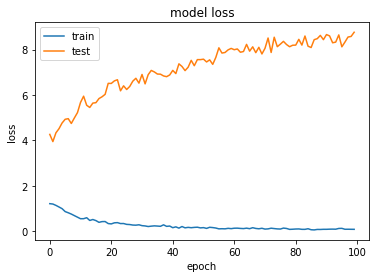

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
import cv2
from PIL import Image
from keras.preprocessing.image import img_to_array
from skimage import transform
default_image_size = tuple((256,256))
def convert_image_to_array(image_dir):
    try:
        images = cv2.imread(image_dir)
        if images is not None:
            images = cv2.resize(images, default_image_size)
        else:
            return np.array([])
    except Exception as E:
        print(f"Error : {E}")
        return None
image_dir="/content/drive/MyDrive/uploads/00b814ee-cfa9-489a-bed3-c1f927bef05a___YLCV_NREC_0220.JPG"

im=convert_image_to_array(image_dir)
np_image = Image.open(image_dir)
np_image = np.array(im).astype('float32')/255


In [ ]:
classifier.save('model.h5')

In [ ]:
#prediction code
from keras.models import load_model
import cv2
import numpy as np

In [ ]:
model = load_model('model.h5')

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
img = cv2.imread('/content/drive/MyDrive/val/Tomato___Tomato_Yellow_Leaf_Curl_Virus/1b2e12ce-3b2e-4747-85f8-de80a3d5dd35___UF.GRC_YLCV_Lab 08565.JPG')
img = cv2.resize(img,(128,128))
img = np.reshape(img,[1,128,128,3])

In [ ]:
classes = model.predict(img)
classes_x=np.argmax(classes,axis=1)
print(classes_x[0])

8
